# Exercise

Use the code in this notebook to complete the following exercises:

1. For `df1`:

    - Take a look at the data in `df1`.
    - Does `x` increase from time one to time two?
    - Visualize the relationship between `x` and `time`.
    - Run a statistical test to further examine the relationship between these features.
    
 1. For `df2`:
 
    - Take a look at the data in `df2`.
    - Visualize the relationship between `x` and `y`.
    - How would you describe the relationship between `x` and `y`?
    - Run a statistical test to examine the relationship between `x` and `y`.

1. For `df3`:

    - Take a look at the data in `df3`
    - Which surgeon has the higher success rate?
    - If you had to have heart bypass surgery, which surgeon would you go to?

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

# df1

###  -Take a look at the data in df1.

In [3]:
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   group   200 non-null    object 
 1   x       200 non-null    float64
 2   time    200 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


In [7]:
df1.describe()

,x
count,200.000000
mean,6.511559
std,2.180756
min,0.556924
25%,4.895169
50%,6.507704
75%,8.261932
max,12.958625


In [8]:
df1.group.value_counts()

a    102
b     98
Name: group, dtype: int64

In [ ]:
# we dont have the same number of observations in a and b

In [9]:
df1.time.value_counts()

one    100
two    100
Name: time, dtype: int64

In [ ]:
# we  have the same number of observations group one and two

### - Does x increase from time one to time two?

In [11]:
df1.groupby('time').mean()

,x
time,
one,5.726669
two,7.296448


<AxesSubplot:xlabel='time'>

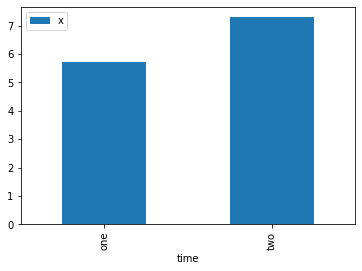

In [13]:
df1.groupby('time').mean().plot.bar()

In [ ]:
#but if we look at groups

In [15]:
df1.pivot_table('x', 'group', 'time')

time,one,two
group,,
a,5.084092,2.936197
b,10.026997,8.065904


In [16]:
#let see if they have the same number of observation
pd.crosstab(df1.group, df1.time)

time,one,two
group,,
a,87,15
b,13,85


In [ ]:
# we dont have a balance distrubution

### - Visualize the relationship between x and time.

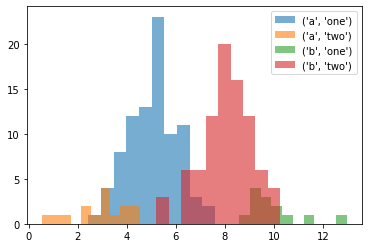

In [19]:
for subgroup, x in df1.groupby(['group','time']).x:
    plt.hist(x, label=str(subgroup), alpha=.6)
plt.legend()
plt.show()

### - Run a statistical test to further examine the relationship between these features.

## df2

### - Take a look at the data in df2.

In [20]:
df2.head()

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
 2   group   200 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


In [22]:
df2.group.value_counts()

d    50
b    50
c    50
a    50
Name: group, dtype: int64

### - Visualize the relationship between x and y.

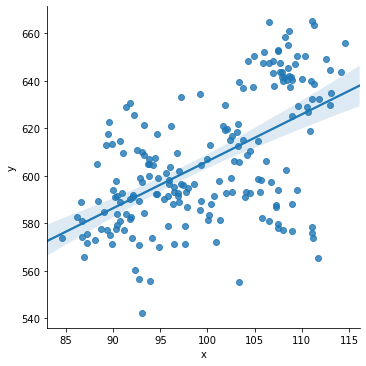

In [14]:

sns.lmplot(x= 'x', y = 'y', data = df2, truncate = False)

In [ ]:
#this shows a positive correlation 

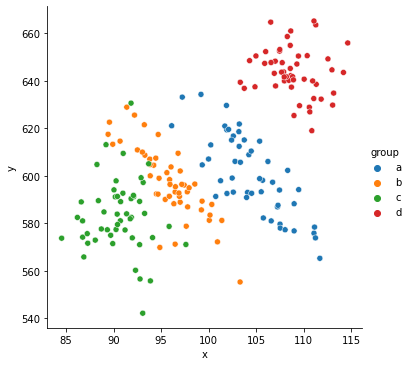

In [23]:
# but if we look at each group
sns.relplot(data=df2, hue='group', x='x', y='y')

In [ ]:
#now we see each a negative correlation

### - How would you describe the relationship between x and y?

### - Run a statistical test to examine the relationship between x and y.

In [ ]:
## simpson's Paradox

- def: when the relationship between two variables reversews itself  when controlling for third variable.
- make sure you vizualize variable interaction between multiple variables. 
- be careful about assumptions around group proportions.